In [ ]:
import imutils
import cv2
import os
from imutils import paths
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D, Dense, Flatten, Dropout
from keras.models import Model
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


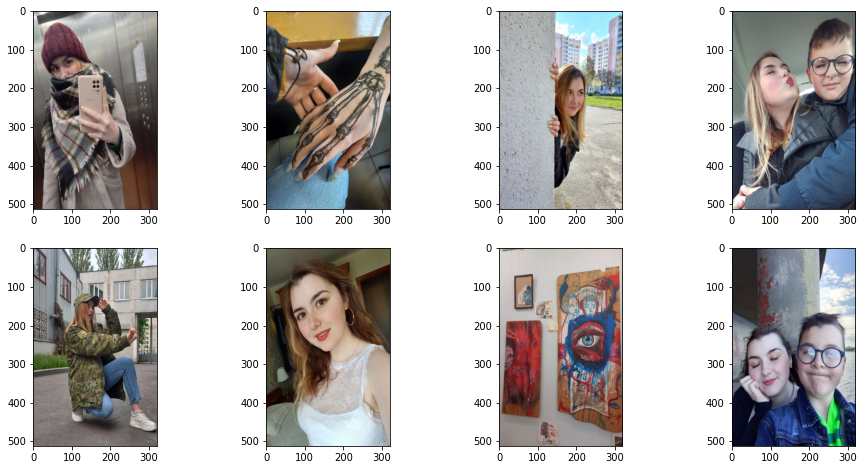

In [ ]:
img_r_h = 512
img_r_l = 320
folder_path = "/content/drive/MyDrive/neiron lab/lab3/my_img"

img_list = os.listdir(folder_path)
dataset=[]
for image_name in img_list:
  image = cv2.imread(folder_path + '/' + image_name, cv2.IMREAD_COLOR)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = Image.fromarray(image)
  image = image.resize((img_r_l ,img_r_h))
  image2arr = np.array(image)/255
  dataset.append(image2arr)


fig, axs = plt.subplots(2,4, figsize = (16, 8))

axs[0][0].imshow(dataset[0])
axs[0][1].imshow(dataset[1])
axs[0][2].imshow(dataset[2])
axs[0][3].imshow(dataset[3])

axs[1][0].imshow(dataset[4])
axs[1][1].imshow(dataset[5])
axs[1][2].imshow(dataset[6])
axs[1][3].imshow(dataset[7])

In [ ]:
X_train, X_test = train_test_split(dataset, test_size= 0.25, random_state = 42)

#поменяла l и h
noise =  np.random.normal(loc=0, scale=1, size=(img_r_h,img_r_l,1))
x_train_noise = np.clip((np.array(X_train)+noise*0.4),0,1)
x_test_noise = np.clip((np.array(X_test)+noise*0.4),0,1)

x_train = np.array(X_train)
x_test = np.array(X_test)


print(x_train_noise.shape)
print(x_train.shape)

(6, 512, 320, 3)
(6, 512, 320, 3)


In [ ]:
print(x_train_noise)

[[[[0.62852902 0.64813686 0.66382313]
   [0.05253088 0.07213873 0.087825  ]
   [0.69036283 0.70997068 0.72173538]
   ...
   [1.         1.         1.        ]
   [0.         0.         0.        ]
   [0.34996043 0.34996043 0.30290161]]

  [[0.64421554 0.66382338 0.67950966]
   [1.         1.         1.        ]
   [0.         0.         0.        ]
   ...
   [0.62459557 0.62459557 0.57753674]
   [0.25261976 0.25261976 0.20556094]
   [0.69872258 0.69872258 0.65166376]]

  [[0.47558616 0.495194   0.51088027]
   [0.14016501 0.15977285 0.17545913]
   [1.         1.         1.        ]
   ...
   [0.27713717 0.27713717 0.23007835]
   [0.711355   0.711355   0.66429618]
   [0.16806722 0.16806722 0.1210084 ]]

  ...

  [[0.18270552 0.10427415 0.08074474]
   [0.44593782 0.36358488 0.34397704]
   [0.         0.         0.        ]
   ...
   [0.48992308 0.36051131 0.32521719]
   [0.12266956 0.         0.        ]
   [0.96607361 0.83666184 0.80136773]]

  [[0.         0.         0.        ]
   [0. 

In [ ]:
# input layer
# поменяла h и l
input_layer = Input(shape=(img_r_h,img_r_l,3))
#encoder

encoded_layer6 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer6 = MaxPool2D( (2, 2), padding='same')(encoded_layer6)

encoded_layer7 = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded_layer6)
encoded_layer7 = MaxPool2D( (2, 2), padding='same')(encoded_layer7)

encoded_layer8 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded_layer7)
encoded = MaxPool2D( (2, 2), padding='same')(encoded_layer8)

In [ ]:
decoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
decoded_layer1 = UpSampling2D( (2, 2))(decoded_layer1)

decoded_layer2 = Conv2D(128, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D( (2, 2))(decoded_layer2)

decoded_layer3 = Conv2D(256, (3, 3), activation='relu', padding='same')(decoded_layer2)
decoded_layer3 = UpSampling2D( (2, 2))(decoded_layer3)

#decoded_layer10 = Flatten()(decoded_layer4)
#decoded_layer11 = Dropout(0.5)(decoded_layer10)
#decoded_layer8 = Dense(384, activation='relu')(decoded_layer4)

output_layer   = Conv2D(3, (3, 3), padding='same', activation='sigmoid')(decoded_layer3)


In [ ]:
'''
decoded_layer1 = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(256, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
output_layer   = Conv2D(3, (3, 3), padding='same', activation='sigmoid')(decoded_layer2)
'''

"\ndecoded_layer1 = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)\ndecoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)\ndecoded_layer2 = Conv2D(256, (3, 3), activation='relu', padding='same')(decoded_layer1)\ndecoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)\noutput_layer   = Conv2D(3, (3, 3), padding='same', activation='sigmoid')(decoded_layer2)\n"

In [ ]:
# compile the model
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 320, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 512, 320, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 160, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 160, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 80, 128)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 80, 64)       73792 

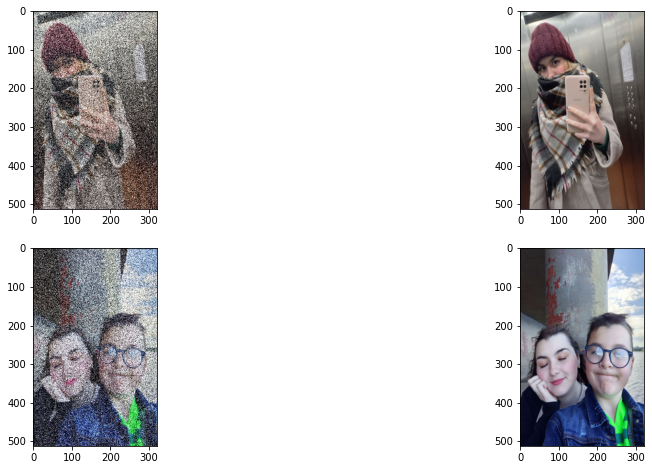

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (16, 8))

axs[0][0].imshow(x_train_noise[0])
axs[0][1].imshow(X_train[0])
axs[1][0].imshow(x_train_noise[1])
axs[1][1].imshow(X_train[1])

In [ ]:
history = model.fit(x_train_noise, x_train, epochs=10, validation_data=(x_test_noise, x_test))

Epoch 1/10
1/1 [==============================] - 51s 51s/step - loss: 0.0548 - val_loss: 0.0736
Epoch 2/10
1/1 [==============================] - 46s 46s/step - loss: 0.0541 - val_loss: 0.0697
Epoch 3/10
1/1 [==============================] - 49s 49s/step - loss: 0.0529 - val_loss: 0.0735
Epoch 4/10
1/1 [==============================] - 45s 45s/step - loss: 0.0533 - val_loss: 0.0653
Epoch 5/10
1/1 [==============================] - 45s 45s/step - loss: 0.0536 - val_loss: 0.0611
Epoch 6/10
1/1 [==============================] - 45s 45s/step - loss: 0.0478 - val_loss: 0.0556
Epoch 7/10
1/1 [==============================] - 45s 45s/step - loss: 0.0415 - val_loss: 0.0366
Epoch 8/10
1/1 [==============================] - 48s 48s/step - loss: 0.0274 - val_loss: 0.0321
Epoch 9/10
1/1 [==============================] - 48s 48s/step - loss: 0.0309 - val_loss: 0.0881
Epoch 10/10
1/1 [==============================] - 48s 48s/step - loss: 0.0948 - val_loss: 0.0233


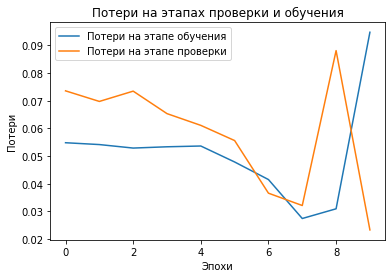

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери на этапах проверки и обучения')
plt.ylabel('Потери')
plt.xlabel('Эпохи')
plt.legend(['Потери на этапе обучения', 'Потери на этапе проверки'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(x_test)

1/1 [==============================] - 5s 5s/step


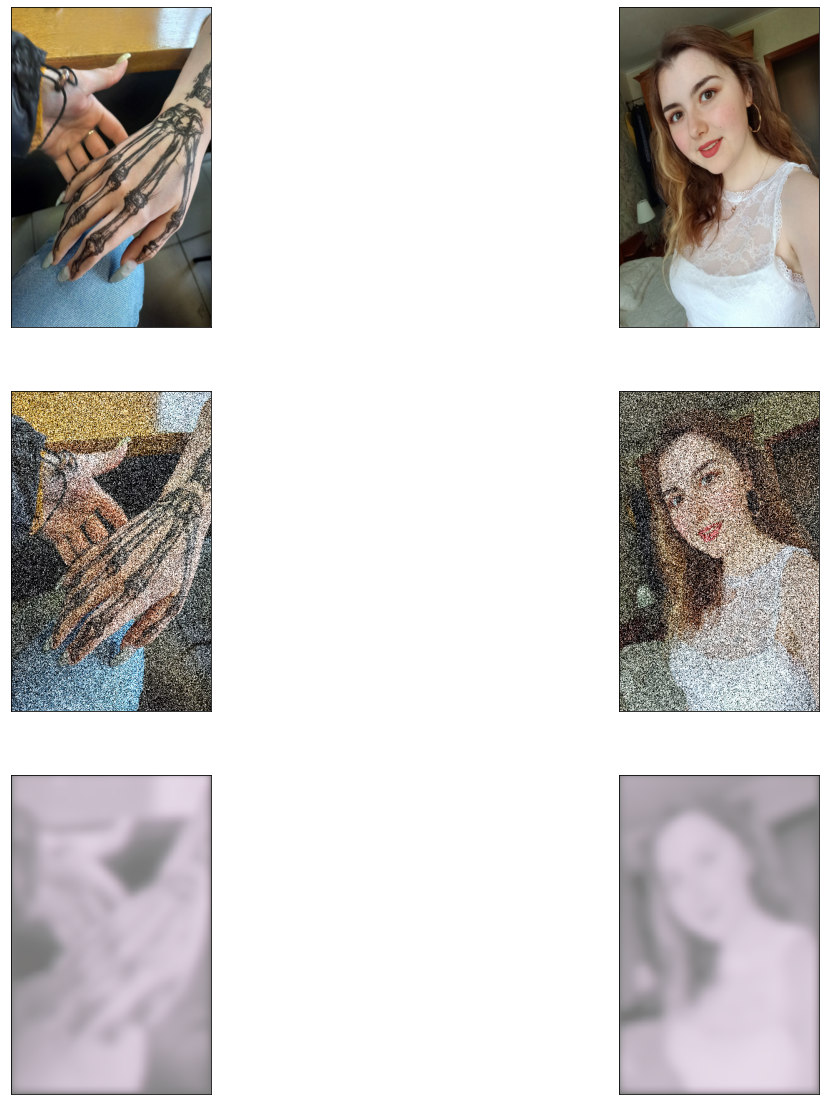

In [ ]:
n = 2
plt.figure(figsize=(20, 20))

for i in range(n):
	# оригинальные изображения
	ax = plt.subplot(3, n, i + 1)
	plt.imshow((x_test[i]))
	plt.gray()
	ax.get_xaxis().set_visible(False)
	ax.get_yaxis().set_visible(False)

            # зашумленные изображения
	ax = plt.subplot(3, n, i + 1 + n)
	plt.imshow(x_test_noise[i])
	plt.gray()
	ax.get_xaxis().set_visible(False)
	ax.get_yaxis().set_visible(False)

	# восстановленные изображения автоэнкодером
	ax = plt.subplot(3, n, i + 1 + 2*n)
	plt.imshow(np.array(pred[i]))
	plt.gray()
	ax.get_xaxis().set_visible(False)
	ax.get_yaxis().set_visible(False)
plt.show()